In [ ]:
import numpy as np
from scipy.signal import convolve2d #convolution
from imageio import imread #read image
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset,DataLoader,TensorDataset
from torchsummary import summary

#Convolution in numpy/scipy

Text(0.5, 1.0, 'Convolution Kernel')

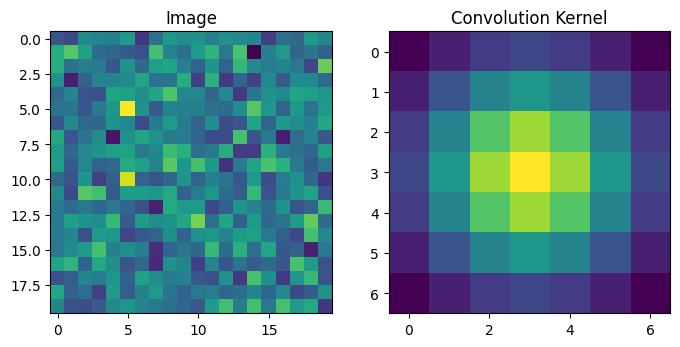

In [ ]:
#image
imgN = 20
image = np.random.randn(imgN,imgN) #noise

#convolution kernel
kernelN = 7
x,y = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel = np.exp(-(x**2 + y**2)/7) #2D - gaussian kernel

fig, ax = plt.subplots(1,2,figsize = (8,6))
ax[0].imshow(image)
ax[0].set_title("Image")
ax[1].imshow(kernel)
ax[1].set_title("Convolution Kernel")

In [ ]:
m = image[0:3,0:3]
kernel
fm = np.dot(m,kernel) #matrix multiplication
m*kernel #elementwise product

array([[-0.13773383,  0.0982073 ,  0.14411313],
       [ 0.42022895, -0.74976716,  0.16469246],
       [ 0.01564366,  0.09371842,  0.09965257]])

In [ ]:
#implementing convolution in numpy
k = imgN-kernelN +1
fm = np.zeros([k,k])

for i in range(k):
  for j in range(k):
    m = image[i:i+kernelN,j:j+kernelN]
    fm[i,j] = np.sum(m*kernel)

In [ ]:
#convolution in scipy
fm2 = convolve2d(image,kernel,mode = 'valid')

In [ ]:
print(fm.shape)
print(fm2.shape)

(14, 14)
(14, 14)


Text(0.5, 1.0, 'Feature map (scipy)')

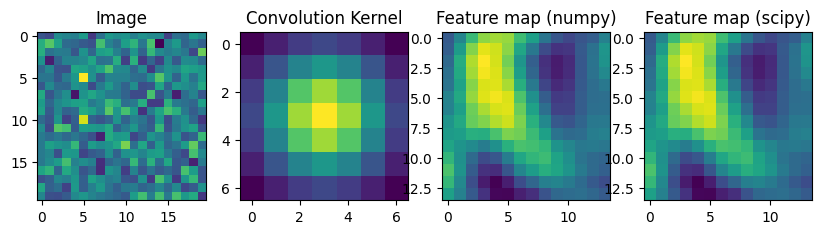

In [ ]:
fig, ax = plt.subplots(1,4,figsize = (10,6))
ax[0].imshow(image)
ax[0].set_title("Image")
ax[1].imshow(kernel)
ax[1].set_title("Convolution Kernel")
ax[2].imshow(fm)
ax[2].set_title("Feature map (numpy)")
ax[3].imshow(fm2)
ax[3].set_title("Feature map (scipy)")